In [ ]:
# Install BERTopic and dependencies (safe to re-run)

%pip install -U bertopic[visualization] sentence-transformers umap-learn hdbscan scikit-learn plotly -q

In [1]:
import pickle

with open('ai_news.pkl', 'rb') as f:
    ai_news = pickle.load(f)
# ai_news.head()
ai_news = ai_news.drop_duplicates(subset=['sentence']).reset_index(drop=True)
ai_news

,sentence,hit,anthroscore,doc_id,url,date,category,title,content,words,pos
0,人工智慧是香港科技園公司重點發展的技術領域之一，目前園區有多家研發人工智慧的企業，技術應用範...,人工智慧,-3.371211,0,https://www.ettoday.net/news/20180522/1174798.htm,2018-05-22 17:44:00,大陸,阿里巴巴揪商湯、科技園 投千萬設香港人工智慧實驗室,\n\n大陸中心／綜合報導\n阿里巴巴集團、商湯集團及香港科技園公司21日宣布合作成立「香港...,"[人工, 智慧, 是, 香港, 科技園, 公司, 重點, 發展, 的, 技術, 領域, 之,...","[Na, Na, SHI, Nc, Nc, Nc, Na, VC, DE, Na, Na, ..."
1,林鄭月娥也提到，人工智慧被視為對下一代影響最深遠的科技，今屆政府預留五百億發展創科藍圖中，也...,人工智慧,-0.528870,0,https://www.ettoday.net/news/20180522/1174798.htm,2018-05-22 17:44:00,大陸,阿里巴巴揪商湯、科技園 投千萬設香港人工智慧實驗室,\n\n大陸中心／綜合報導\n阿里巴巴集團、商湯集團及香港科技園公司21日宣布合作成立「香港...,"[林鄭月娥, 也, 提到, ，, 人工, 智慧, 被, 視為, 對, 下, 一, 代, 影響...","[Nb, D, VE, COMMACATEGORY, Na, Na, P, VG, P, N..."
2,自2022年底開始，以ChatGPT為首的生成式AI應運而生，對於商業活動、教育工作乃至於公...,ChatGPT,-1.827064,3,https://finance.ettoday.net/news/2607721,2023-10-28 14:29:00,產經,年度最大AI法律研討會登場 國內外專家7大面向探討監管問題,\n記者蕭文康／綜合報導\n永齡基金會力挺AI法律教育，今年特別與人工智慧法律國際研究基金會...,"[自, 2022年, 底, 開始, ，, 以, Chat, GPT, 為首, 的, 生成式,...","[P, Neu, Ng, VH, COMMACATEGORY, P, FW, FW, VI,..."
3,基於對於AI法律教育的重視，今年永齡基金會亦加入支持，並邀請到全球AI大師：工業大數據專家、...,AI,-1.221877,3,https://finance.ettoday.net/news/2607721,2023-10-28 14:29:00,產經,年度最大AI法律研討會登場 國內外專家7大面向探討監管問題,\n記者蕭文康／綜合報導\n永齡基金會力挺AI法律教育，今年特別與人工智慧法律國際研究基金會...,"[基於, 對於, AI, 法律, 教育, 的, 重視, ，, 今年, 永齡, 基金會, 亦,...","[P, P, FW, Na, Na, DE, VJ, COMMACATEGORY, Nd, ..."
4,李傑表示，由於5G、工業大數據、元宇宙，與人工智慧的發展，未來的產業系統將更多地以高度連接的...,人工智慧,-1.696100,3,https://finance.ettoday.net/news/2607721,2023-10-28 14:29:00,產經,年度最大AI法律研討會登場 國內外專家7大面向探討監管問題,\n記者蕭文康／綜合報導\n永齡基金會力挺AI法律教育，今年特別與人工智慧法律國際研究基金會...,"[李傑, 表示, ，, 由於, 5G, 、, 工業, 大, 數據, 、, 元, 宇宙, ，,...","[Nb, VE, COMMACATEGORY, Cbb, Neu, PAUSECATEGOR..."
...,...,...,...,...,...,...,...,...,...,...,...
8254,在每一集的節目尾聲，她們除各自帶來演出，更合作共演改編版本的《溫柔的生活革命》，陳嫺靜也分享...,A.I.,6.824102,14829,https://star.ettoday.net/news/2271265,2022-06-12 15:43:00,娛樂,被金曲歌王讚：接下來是她的時代！ 女星自揭「私下生活真實面」,\n記者翁子涵／台北報導\n陳嫺靜以充滿特色的聲音與風格活躍在台灣各大音樂祭，2019年曾受...,"[在, 每, 一, 集, 的, 節目, 尾聲, ，, 她們, 除, 各自, 帶來, 演出, ...","[P, Nes, Neu, Nf, DE, Na, Na, COMMACATEGORY, N..."
8255,「另外，同樣在雲林，我們用AI保存霹靂布袋戲的傳統文化。」,AI,-2.664614,14834,https://www.ettoday.net/news/20190629/1478198.htm,2019-06-29 16:37:00,政治,政見會全文／痛心中華民國被折磨 郭台銘：蔡不好吃換郭來煮,\n\n 記者陳家祥／台北報導\n國民黨內初選打得激烈，29日進行第二場「國政願景電視發表會...,"[「, 另外, ，, 同樣, 在, 雲林, ，, 我們, 用, AI, 保存, 霹靂, 布袋...","[PARENTHESISCATEGORY, Cbb, COMMACATEGORY, Dfa,..."
8256,郭台銘說，大家對這個聲音應該很熟悉，其實霹靂所有角色都是由黃文擇副董事長配音，「但剛剛素還真...,AI,4.714407,14834,https://www.ettoday.net/news/20190629/1478198.htm,2019-06-29 16:37:00,政治,政見會全文／痛心中華民國被折磨 郭台銘：蔡不好吃換郭來煮,\n\n 記者陳家祥／台北報導\n國民黨內初選打得激烈，29日進行第二場「國政願景電視發表會...,"[郭台銘, 說, ，, 大家, 對, 這, 個, 聲音, 應該, 很, 熟悉, ，, 其實,...","[Nb, VE, COMMACATEGORY, Nh, P, Nep, Nf, Na, D,..."
8257,在此地圖中，玩家必須收集資源並協助 AI所控制的大天使機甲迎戰聲勢浩大的混源體首領。,AI,0.584078,14851,https://game.ettoday.net/article/1045458.htm,2017-11-04 14:05:00,科技,暴雪嘉年華大放送！《星海爭霸II》即將改為免費遊戲,記者周之鼎／美國安納罕報導\n經過七年的演進，包含多款對戰地圖和合作指揮官的推出，今年的暴雪...,"[在, 此, 地圖, 中, ，, 玩家, 必須, 收集, 資源, 並, 協助, AI, 所...","[P, Nep, Na, Ng, COMMACATEGORY, Na, D, VC, Na,..."


In [ ]:
import jieba, os

# load custom user words to keep them intact
if os.path.exists('userwords.txt'):
    jieba.load_userdict('userwords.txt')

# load stopwords
with open('stopwords_zh-tw.txt', 'r', encoding='utf-8') as f:
    stopwords = {w.strip() for w in f if w.strip()}


def tokenize_sentence(s):
    tokens = jieba.lcut(s, cut_all=False)
    return [t for t in tokens if t.strip() and t not in stopwords]

ai_news['tokens'] = ai_news['sentence'].apply(tokenize_sentence)
ai_news[['sentence', 'tokens']].head()

,sentence,tokens,words
0,人工智慧是香港科技園公司重點發展的技術領域之一，目前園區有多家研發人工智慧的企業，技術應用範...,"[人工智慧, 香港, 科技, 園, 公司, 重點, 發展, 技術, 領域, 目前, 園區, ...","[人工, 智慧, 是, 香港, 科技園, 公司, 重點, 發展, 的, 技術, 領域, 之,..."
1,林鄭月娥也提到，人工智慧被視為對下一代影響最深遠的科技，今屆政府預留五百億發展創科藍圖中，也...,"[林, 鄭月, 娥, 提到, 人工智慧, 被視, 下一代, 影響, 最深, 遠, 科技, 今...","[林鄭月娥, 也, 提到, ，, 人工, 智慧, 被, 視為, 對, 下, 一, 代, 影響..."
2,自2022年底開始，以ChatGPT為首的生成式AI應運而生，對於商業活動、教育工作乃至於公...,"[2022, 年底, ChatGPT, 為首, 生成式, AI, 應運而生, 商業, 活動,...","[自, 2022年, 底, 開始, ，, 以, Chat, GPT, 為首, 的, 生成式,..."
3,基於對於AI法律教育的重視，今年永齡基金會亦加入支持，並邀請到全球AI大師：工業大數據專家、...,"[基, AI, 法律, 教育, 重視, 今年, 永齡, 基金, 亦, 加入, 支持, 並邀,...","[基於, 對於, AI, 法律, 教育, 的, 重視, ，, 今年, 永齡, 基金會, 亦,..."
4,李傑表示，由於5G、工業大數據、元宇宙，與人工智慧的發展，未來的產業系統將更多地以高度連接的...,"[李傑, 表示, 5G, 工業, 大數據, 元, 宇宙, 人工智慧, 發展, 未來, 產業系...","[李傑, 表示, ，, 由於, 5G, 、, 工業, 大, 數據, 、, 元, 宇宙, ，,..."


In [ ]:
# Prepare documents for BERTopic (raw sentences + space-joined tokens)

ai_news['tokens_str'] = ai_news['tokens'].apply(lambda toks: ' '.join(toks))

documents_raw = ai_news['sentence'].tolist()  # used for embeddings
documents_tokenized = ai_news['tokens_str'].tolist()  # used by vectorizer (c-TF-IDF)

In [5]:
from gensim import corpora
from gensim.models import LdaModel

# Create dictionary and corpus
dictionary = corpora.Dictionary(ai_news['tokens'])
corpus = [dictionary.doc2bow(text) for text in ai_news['tokens']]

# Build LDA model
num_topics = 10
lda_model = LdaModel(corpus=corpus, 
                     id2word=dictionary, 
                     num_topics=num_topics, 
                     random_state=42,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Display topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

Topic 0: 0.013*"網友" + 0.011*"影片" + 0.008*"照片" + 0.008*"圖" + 0.007*"AI" + 0.006*"愛" + 0.005*"房屋" + 0.005*"臉書" + 0.005*"看到" + 0.005*"分享"
Topic 1: 0.020*"柯文" + 0.011*"北流" + 0.010*"哲" + 0.008*"歌曲" + 0.008*"蔡詩萍" + 0.008*"晚間" + 0.007*"日" + 0.007*"競選" + 0.007*"餐廳" + 0.006*"媽媽"
Topic 2: 0.020*"AMD" + 0.019*"ChatGPT" + 0.007*"謝" + 0.007*"金河" + 0.006*"檢查" + 0.005*"運動" + 0.005*"時" + 0.005*"OpenAI" + 0.005*"至少" + 0.004*"記憶"
Topic 3: 0.071*"AI" + 0.010*"人工智慧" + 0.010*"發展" + 0.009*"未來" + 0.009*"科技" + 0.008*"台灣" + 0.008*"表示" + 0.007*"年" + 0.007*"人" + 0.007*"說"
Topic 4: 0.010*"換臉" + 0.009*"製" + 0.009*"照片" + 0.008*"拍" + 0.008*"作" + 0.007*"Pixel" + 0.006*"影片" + 0.006*"系列" + 0.005*"影音" + 0.005*"透過"
Topic 5: 0.012*"醫療" + 0.011*"智慧" + 0.009*"數位" + 0.008*"人工智慧" + 0.006*"透過" + 0.006*"提供" + 0.006*"科技" + 0.006*"產業" + 0.005*"轉型" + 0.005*"健康"
Topic 6: 0.014*"學生" + 0.012*"AI" + 0.008*"課程" + 0.008*"學習" + 0.006*"孩子" + 0.005*"老師" + 0.005*"生成" + 0.004*"下" + 0.004*"教育" + 0.004*"說"
Topic 7: 0.009*"財報" + 0.009*"詐騙" + 0.

In [ ]:
# Compute sentence embeddings for raw sentences

from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = embedder.encode(
    documents_raw,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=True
)

len(embeddings), embeddings.shape

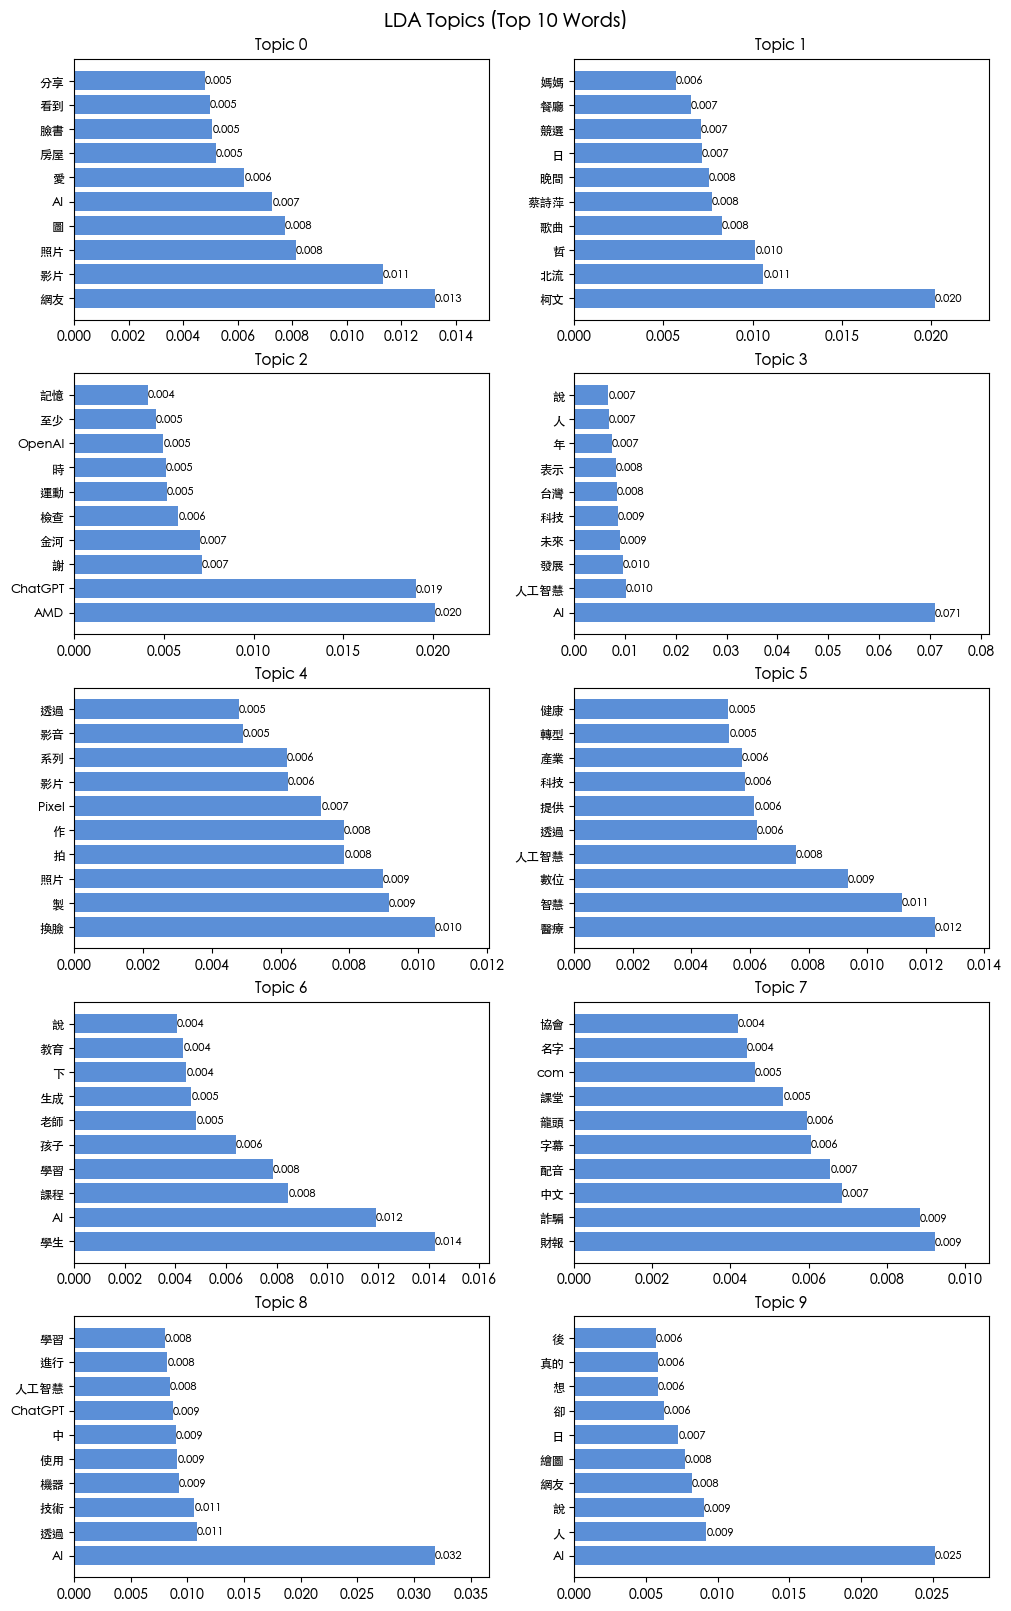

In [8]:
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Set Chinese font (Heiti TC Light) if available
font_name = 'Heiti TC'
if font_name in [f.name for f in font_manager.fontManager.ttflist]:
    plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # ensure minus sign renders

# Get topics as list of (topic_id, [(word, weight), ...])
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)

n_topics = len(topics)
cols = 2
rows = math.ceil(n_topics / cols)

fig, axes = plt.subplots(rows, cols, figsize=(10, 3.2 * rows), constrained_layout=True)
if rows == 1:
    axes = [axes]
axes = axes.flatten()

for ax, (tid, word_weights) in zip(axes, topics):
    words = [w for w, _ in word_weights][::-1]
    weights = [float(wt) for _, wt in word_weights][::-1]
    ax.barh(range(len(words)), weights, color='#5b8fd7')
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words, fontsize=9)
    ax.set_title(f'Topic {tid}', fontsize=11)
    ax.set_xlim(0, max(weights)*1.15)
    for i, v in enumerate(weights):
        ax.text(v, i, f'{v:.3f}', va='center', ha='left', fontsize=8)
    ax.invert_yaxis()

for j in range(len(topics), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('LDA Topics (Top 10 Words)', fontsize=14)
plt.show()

In [ ]:
# Fit BERTopic with best-practice components for Chinese

from bertopic import BERTopic
from umap import UMAP
import hdbscan
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Vectorizer: split on spaces (since we pre-tokenized) and include bigrams
vectorizer_model = CountVectorizer(
    tokenizer=str.split,
    token_pattern=None,      # required when supplying a tokenizer
    ngram_range=(1, 2),
    min_df=2,
    stop_words=list(stopwords) if isinstance(stopwords, (set, list)) else None
)

# UMAP reduces dimensionality for HDBSCAN clustering
umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

# HDBSCAN on UMAP space (euclidean after UMAP is recommended)
hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=15,
    min_samples=5,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

# Create and fit the BERTopic model
topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True,
    low_memory=True,
    top_n_words=10,
    min_topic_size=15
)

topics, probs = topic_model.fit_transform(documents_tokenized, embeddings)

# Attach results to dataframe
ai_news['topic'] = topics
ai_news['topic_prob'] = np.max(probs, axis=1) if probs is not None else np.nan

# Show topic summary
topic_model.get_topic_info().head(15)

In [ ]:
# Interactive visualizations (Plotly)

fig_topics = topic_model.visualize_topics()
fig_topics.show()

fig_bars = topic_model.visualize_barchart(top_n_topics=12)
fig_bars.show()

fig_hier = topic_model.visualize_hierarchy()
fig_hier.show()

fig_heat = topic_model.visualize_heatmap()
fig_heat.show()

In [ ]:
# Persist model and exports

import pandas as pd

# Save BERTopic model
model_path = "bertopic_model"
topic_model.save(model_path)
print(f"Model saved to {model_path}")

# Export topic info and enriched dataframe
topic_info = topic_model.get_topic_info()
ai_news.to_csv("ai_news_topics.csv", index=False)
topic_info.to_csv("bertopic_topic_info.csv", index=False)
print("Saved ai_news_topics.csv and bertopic_topic_info.csv")

# Quick preview
ai_news[['sentence','topic','topic_prob']].head()